In [2]:
import h5py
import numpy as np
from collections import defaultdict
import pandas as pd 

from plotting_tools import *

In [147]:
experiment_series = "20250529"
df = pd.read_csv(f"../../preprocessing/preprocessed_data/{experiment_series}/1_output_v4_travel_times.csv")

In [148]:
df.columns = df.columns.str.strip()
df.iloc[:,0] = df.iloc[:,0].str.strip()

In [149]:
col_pos = round(len(df.columns)/2)-1
col1 = df.columns[col_pos][:6]
row1_index = df.columns[col_pos][6:]
row1 = df.columns.tolist()[col_pos+1:]
df = df.iloc[:,:col_pos+1]
df.rename(columns={df.columns[col_pos]: col1}, inplace=True)


In [155]:
df = pd.concat([df, pd.DataFrame([row1_index]+row1, index=df.columns[:]).T])

In [156]:
df.columns = [manhole_names[x] if x in manhole_names.keys() else x for x in df.columns.values.tolist()]
df.iloc[:,0] = [manhole_names[x] if x in manhole_names.keys() else x for x in df.iloc[:,0].values]
df = df.set_index("")

In [158]:
df = df.loc[df.index.isin(manhole_names.values()), df.columns.isin(manhole_names.values())]

In [169]:
df.reindex(index=list(manhole_names.values()),columns=list(manhole_names.values()))/(60*60)

,N_Ua,N_Ub,N_Uc,C_U,S_Ua,S_Ub,S_M1,S_M2,S_M3,S_M4,E_U,E_M,N_D,SCE_D1,SCE_D2,Overall
,,,,,,,,,,,,,,,,
N_Ua,0.0,2.753056,3.813611,5.308333,7.217222,7.401667,6.966667,6.082222,5.844167,5.846111,4.856389,4.26,1.971111,3.495833,2.440556,2.479167
N_Ub,2.753056,0.0,6.100833,5.876944,6.447778,6.632222,5.527778,4.679167,4.441389,4.369444,5.425,4.828611,2.539722,4.064444,3.009167,3.047778
N_Uc,3.813611,6.100833,0.0,4.745,4.271667,4.456111,4.021111,3.136667,2.898611,2.900556,4.293056,3.696944,5.319167,3.205556,5.788333,5.827222
C_U,5.308333,5.876944,4.745,0.0,3.923056,4.1075,3.002778,2.154444,1.916389,1.844444,2.9,2.303889,3.337222,1.8125,2.867778,3.053889
S_Ua,7.217222,6.447778,4.271667,3.923056,0.0,1.81,1.375278,2.223611,2.076667,2.078611,3.471111,2.874722,3.908056,2.383611,3.438889,3.625
S_Ub,7.401667,6.632222,4.456111,4.1075,1.81,0.0,0.467778,1.316389,1.554444,1.626111,3.018889,2.4225,4.0925,2.568056,2.986389,3.1725
S_M1,6.966667,5.527778,4.021111,3.002778,1.375278,0.467778,0.0,0.848611,1.086389,1.158333,2.550833,1.954722,2.988056,1.463333,2.518611,2.704722
S_M2,6.082222,4.679167,3.136667,2.154444,2.223611,1.316389,0.848611,0.0,0.238056,0.309722,1.7025,1.106111,2.139444,0.615,1.67,1.856111
S_M3,5.844167,4.441389,2.898611,1.916389,2.076667,1.554444,1.086389,0.238056,0.0,0.071944,1.464444,0.868056,1.901667,0.376944,1.432222,1.618333


In [175]:
df = df.reindex(index=list(manhole_names.values()),columns=list(manhole_names.values()))

In [176]:
pd.to_timedelta(df.iloc[:,-1], unit="s")


N_Ua      0 days 02:28:45
N_Ub      0 days 03:02:52
N_Uc      0 days 05:49:38
C_U       0 days 03:03:14
S_Ua      0 days 03:37:30
S_Ub      0 days 03:10:21
S_M1      0 days 02:42:17
S_M2      0 days 01:51:22
S_M3      0 days 01:37:06
S_M4      0 days 01:32:47
E_U       0 days 02:36:07
E_M       0 days 02:00:20
N_D       0 days 00:30:29
SCE_D1    0 days 01:14:29
SCE_D2    0 days 00:11:10
Overall   0 days 00:00:00
Name: Overall, dtype: timedelta64[ns]

In [177]:
distances = [15.84, 16.18, 30.75, 22.97, 30.08, 31.19,24.50, 19.55, 17.08, 16.16, 24.53, 18.59, 2.42, 12.12, 2.74, 0]

Text(0, 0.5, 'Travel time (h)')

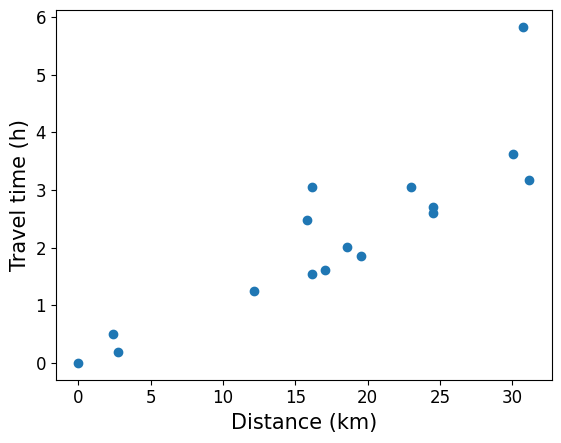

In [ ]:
# plot together with distance

plt.scatter(distances, df.iloc[:,-1]/(60*60),label="Travel time")
plt.xlabel("Distance (km)")
plt.ylabel("Travel time (h)")


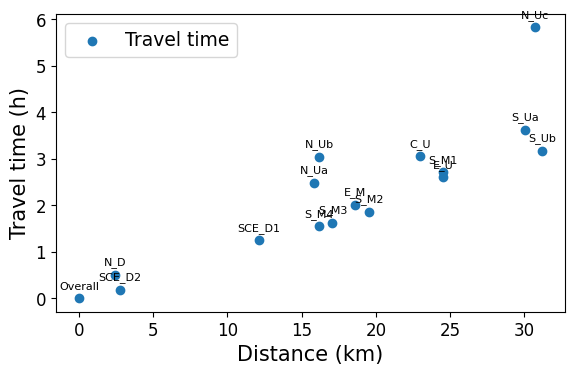

In [187]:
# your data
travel_hours = df.iloc[:, -1] / 3600                # convert s → h
names = df.index                                   # list of labels, same length as distances

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(distances, travel_hours, label="Travel time")

# add one label per point
for x, y, label in zip(distances, travel_hours, names):
    ax.annotate(
        label,                         # the text
        (x, y),                        # point to label
        xytext=(0, 5),                 # “nudge” the text 5 px upward
        textcoords="offset points",
        ha="center", va="bottom",
        fontsize=8                     # keep them small
    )

ax.set_xlabel("Distance (km)")
ax.set_ylabel("Travel time (h)")
ax.legend()
plt.tight_layout()
plt.show()
